In [2]:
import geopandas as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# data for NYC boroughs
nyc=pd.read_csv("./data/out/yt_districts_cleaned.csv")

In [6]:
nyc.head()

,Unnamed: 0,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,congestion_surcharge
0,0,1577838495,1577838783,1.0,1.2,Manhattan,Manhattan,1,6.0,2.5
1,1,1577838939,1577839384,1.0,1.2,Manhattan,Manhattan,1,7.0,2.5
2,2,1577839661,1577840032,1.0,0.6,Manhattan,Manhattan,1,6.0,2.5
3,9,1577838541,1577839228,2.0,0.7,Manhattan,Manhattan,1,8.0,2.5
4,10,1577840111,1577841123,2.0,2.4,Manhattan,Manhattan,1,12.0,2.5


In [14]:
nyc.loc[nyc["PULocationID"]=="Manhattan"]["passenger_count"].sum()

8524172.0

In [27]:
nyc_pul_pa_df=pd.DataFrame()
nyc_pul_pa_df['BoroName']=['Brooklyn','Bronx','Manhattan','Queens','Staten Island']
nyc_pul_pa_df['longitude']=[985000,1000000,970000 ,1040000,925000]
nyc_pul_pa_df['latitude']=[180000,250000,220000,200000,150000]
districs = nyc_pul_pa_df["BoroName"].unique()
index = 0
for district in districs:
    nyc_pul_pa_df.at[index, "pa_count"] = nyc.loc[nyc["PULocationID"]==district]["passenger_count"].sum()
    index=index+1

nyc_pul_pa_df

,BoroName,longitude,latitude,pa_count
0,Brooklyn,985000,180000,34656.0
1,Bronx,1000000,250000,9717.0
2,Manhattan,970000,220000,8524172.0
3,Queens,1040000,200000,282780.0
4,Staten Island,925000,150000,3230.0


In [29]:
# load the data from geopandas.datasets
nyc_shp = gp.read_file(gp.datasets.get_path('nybb'))

In [31]:
# merge con_fa_nyc and nyc_shp
nyc_shp=nyc_shp.merge(nyc_pul_pa_df,on='BoroName')
nyc_shp.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,longitude,latitude,pa_count
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",925000,150000,3230.0
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",1040000,200000,282780.0
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",985000,180000,34656.0
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",970000,220000,8524172.0
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1000000,250000,9717.0


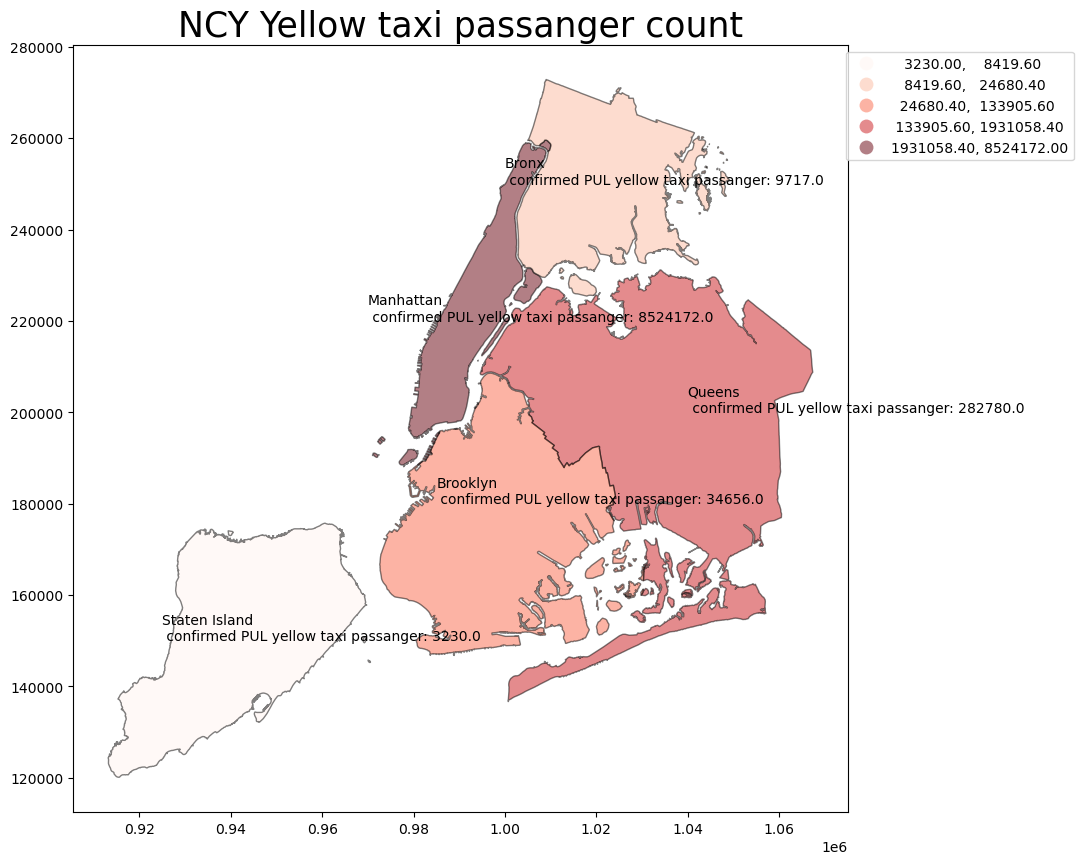

In [39]:
# plot new york city 
ax = nyc_shp.plot(column='pa_count',figsize=(10, 10), alpha=0.5, edgecolor='k', cmap='Reds',legend=True,scheme="quantiles")
# add boroughs' names with numbers of confirmed cases and fatalities
for i in range(len(nyc_shp)):
    plt.text(nyc_shp.longitude[i],nyc_shp.latitude[i],"{}\n confirmed PUL yellow taxi passanger: {}".format(nyc_shp.BoroName[i],nyc_shp.pa_count[i],size=13))
plt.title('NCY Yellow taxi passanger count',fontsize=25)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))
plt.show()